In [3]:
import os
import cv2
import numpy as np
import scipy

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set_style("white")
from PIL import Image

/home/zizoz/Documents/img_process/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better
from itertools import cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [9]:
input_folder = "./ez_image"
list_files = os.listdir(input_folder)
len(list_files)

24

In [10]:
np_data = [cv2.imread(input_folder + "/" + f) for f in list_files]

In [11]:
for i in np_data:
    print(i.shape)

(507, 1649, 3)
(346, 1291, 3)
(217, 937, 3)
(216, 885, 3)
(218, 870, 3)
(317, 1242, 3)
(402, 1392, 3)
(209, 830, 3)
(458, 1675, 3)
(377, 1350, 3)
(375, 1511, 3)
(275, 1127, 3)
(281, 1114, 3)
(237, 837, 3)
(267, 1074, 3)
(234, 937, 3)
(268, 1085, 3)
(262, 1015, 3)
(336, 1217, 3)
(207, 798, 3)
(296, 1138, 3)
(289, 1205, 3)
(196, 846, 3)
(397, 1459, 3)


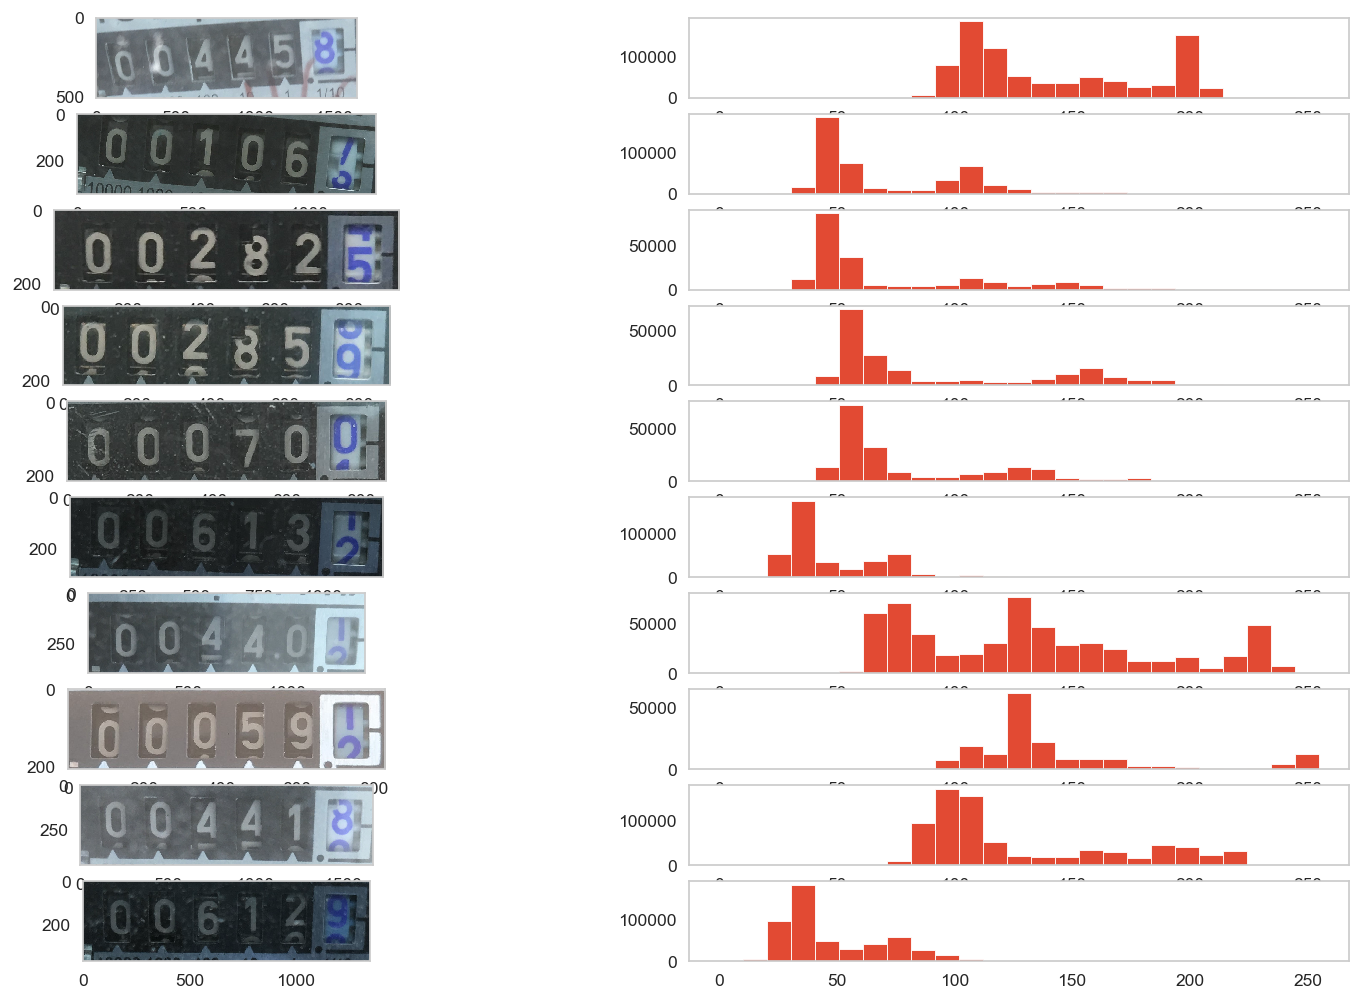

In [12]:
bins_8bit = np.linspace(0, 255, 26)
fig, m_axs = plt.subplots(10, 2, figsize=(15, 10))
for (c_ax, d_ax), c_img in zip(m_axs, np_data):
    c_ax.imshow(c_img)
    gray_img = cv2.cvtColor(c_img, cv2.COLOR_BGR2GRAY)
    d_ax.hist(gray_img.ravel(), bins_8bit)

In [13]:
from skimage.exposure import rescale_intensity

(array([3., 4., 8., 7., 2., 1., 0.]),
 array([  0.        ,  36.42857143,  72.85714286, 109.28571429,
        145.71428571, 182.14285714, 218.57142857, 255.        ]),
 <a list of 7 Patch objects>)

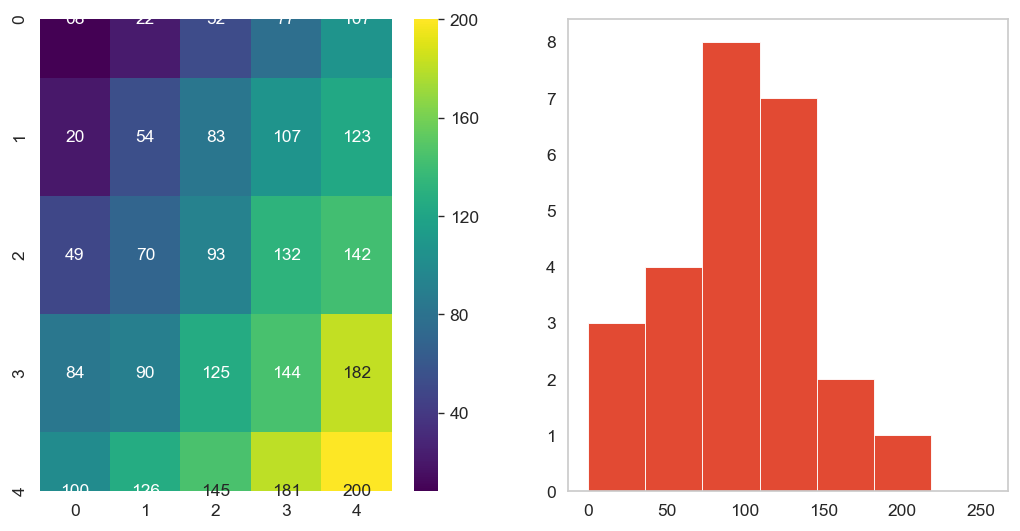

In [17]:
np.random.seed(2019)
xx = np.stack([np.arange(5)]*5, -1)
yy = xx.T
bins_sample_8bit = np.linspace(0, 255, 8)
sample_img = (25*(xx+yy)+np.random.uniform(-10, 10, size=(5, 5))).astype('uint8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.heatmap(sample_img, annot=True,fmt='02d', ax=ax1, cmap='viridis')
ax2.hist(sample_img.ravel(), bins_sample_8bit, label='Original', alpha=1)

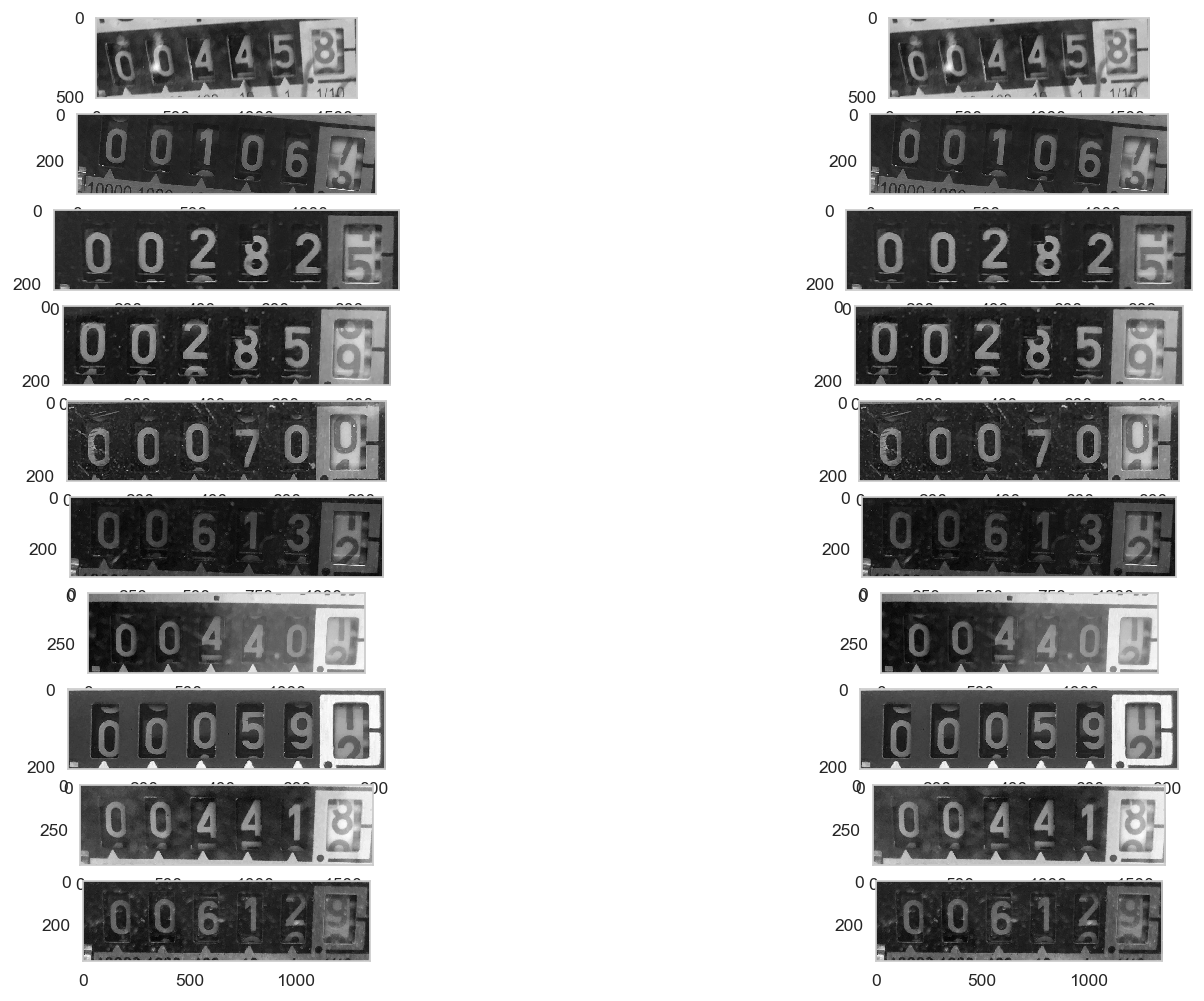

In [18]:
fig, m_axs = plt.subplots(10, 2, figsize=(15, 10))
for (c_ax, d_ax), img in zip(m_axs, np_data):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    n_img = rescale_intensity(gray_img)
    c_ax.imshow(gray_img)
    d_ax.imshow(n_img)

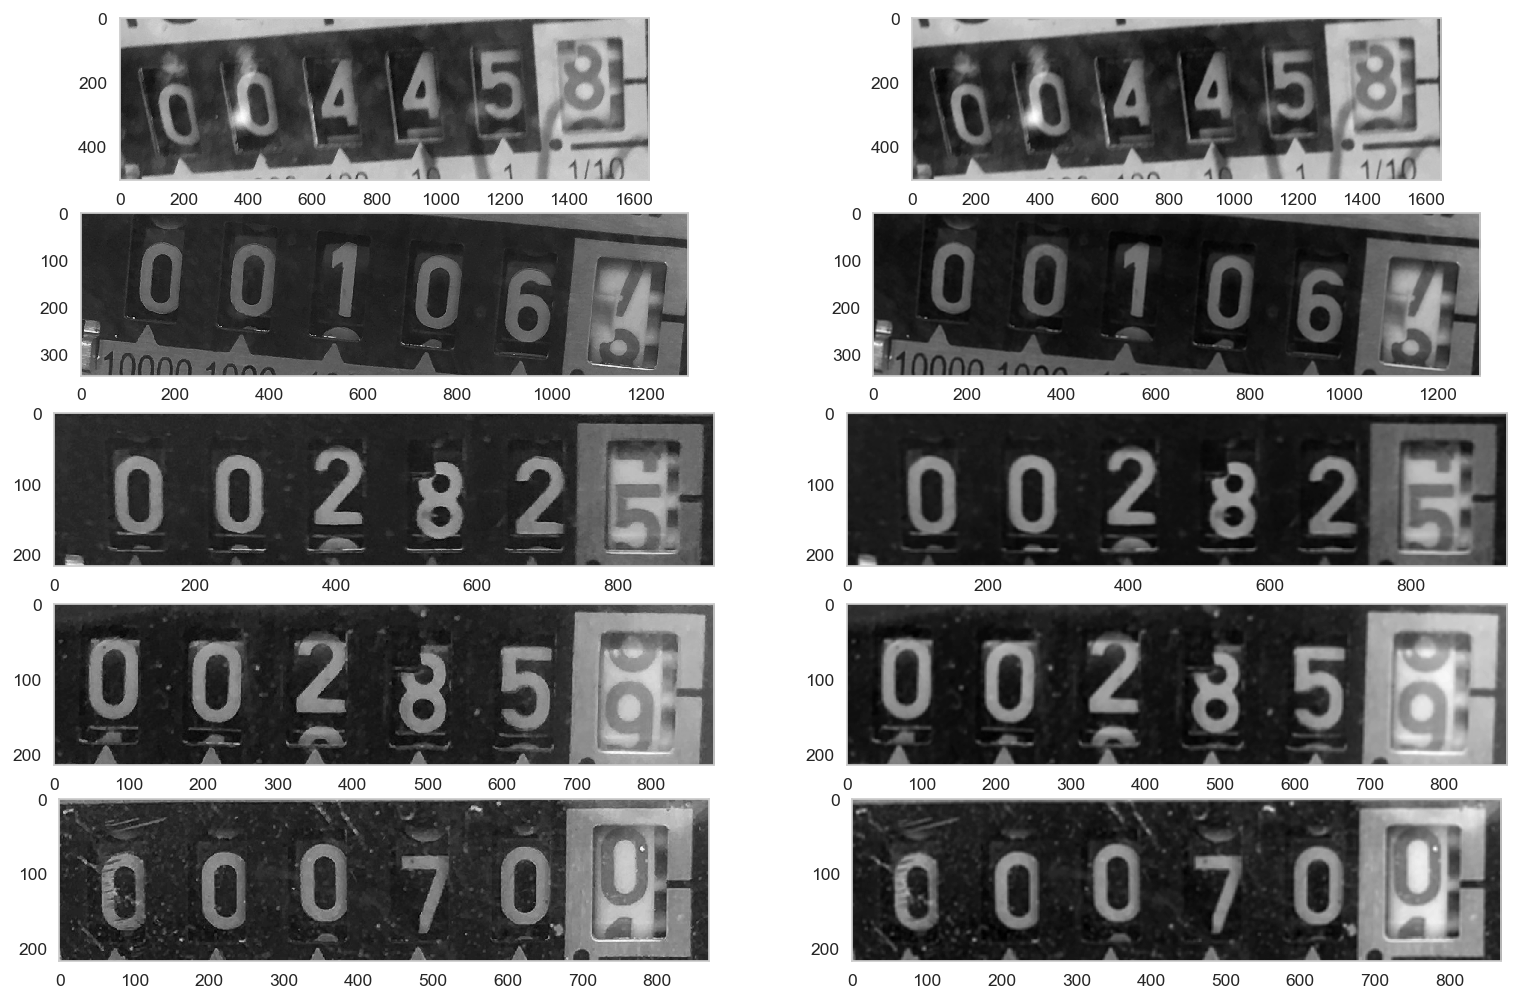

In [20]:
fig, m_axs = plt.subplots(5, 2, figsize=(15, 10))
for (c_ax, d_ax), img in zip(m_axs, np_data):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(gray_img,(5,5))
    c_ax.imshow(gray_img)
    d_ax.imshow(blur)

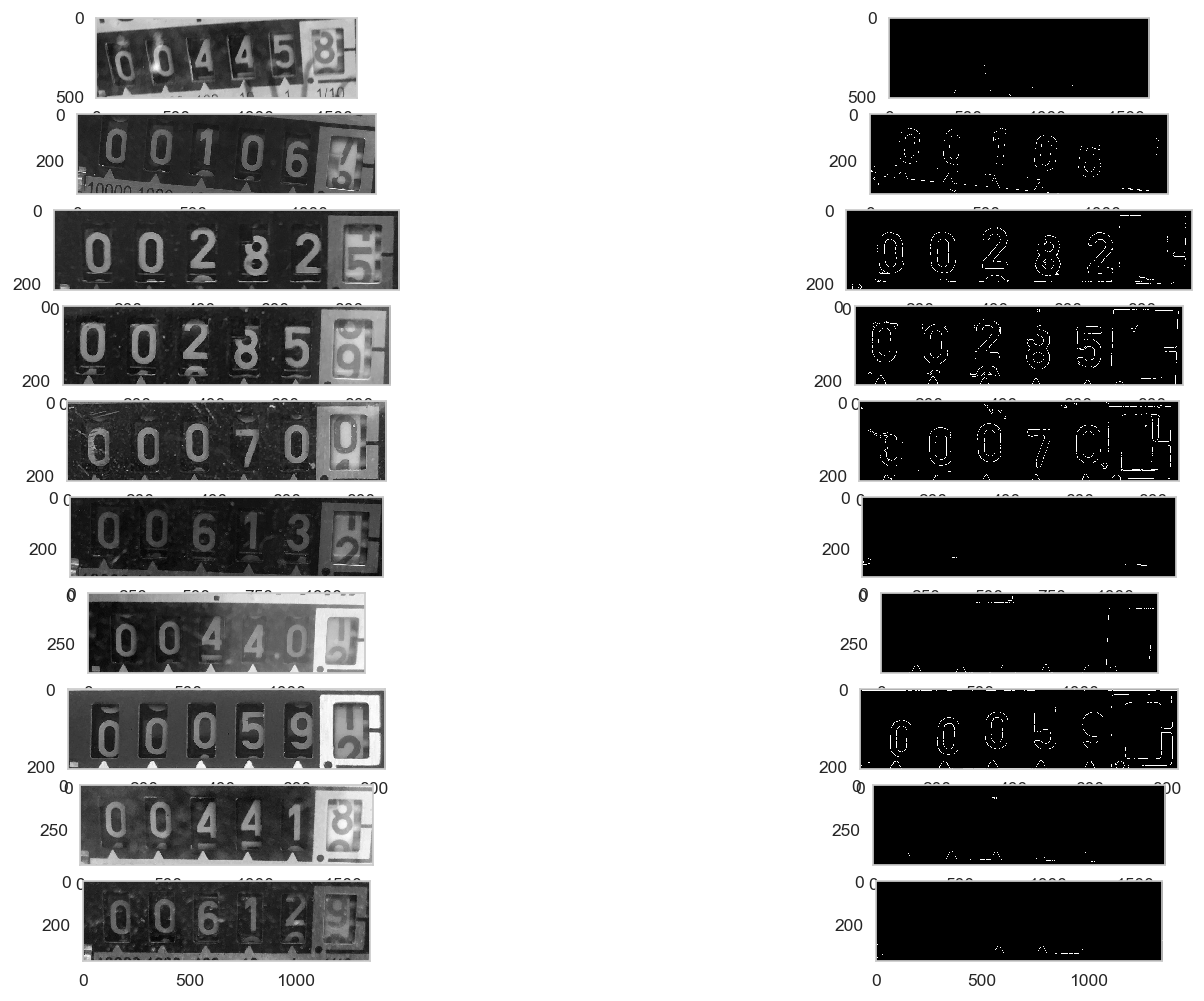

In [22]:
fig, m_axs = plt.subplots(10, 2, figsize=(15, 10))
for (c_ax, d_ax), img in zip(m_axs, np_data):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray_img,10,50,50)
    edges = cv2.Canny(blur,35,175)
    c_ax.imshow(gray_img)
    d_ax.imshow(edges)
